# Logistic Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

## 1. Sigmoid Function and Gradient Descent
### 1.1 Sigmoid function:
$$\sigma(z)=\frac{1}{1+e^{-z}}$$
### 1.2 Gradient Descent
The input $z$ could be given as:
$$\begin{align*}
z &= w_0x_0 + w_1x_1 +w_2x_2 + \cdots + w_nx_n\\
&= \mathbf{w}^T \mathbf{x}
\end{align*}$$
By using gradient descent, we update $\mathbf{w}$ by:
$$\mathbf{w} := \mathbf{w} - \alpha \nabla_{\mathbf{w}}f(\mathbf{w})$$

Text(0, 0.5, 'Sigmoid(z)')

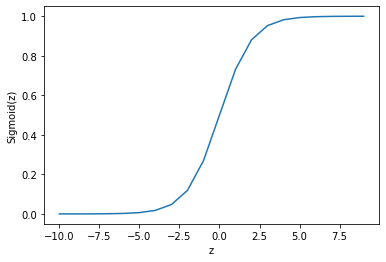

In [2]:
def sigmoid(z):
    f = 1/(1+np.exp(-z))
    return f

z = np.arange(-10,10)
s = sigmoid(z)
fig,ax = plt.subplots()
ax.plot(z,s)
ax.set_xlabel('z')
ax.set_ylabel('Sigmoid(z)')

## 2. Implementation
### 2.1 Gradient Descent

In [3]:
def loaddata():
    data = []
    labels = []
    path = 'TestSet.txt'
    with open(path) as f:
        content = f.readlines()
        for line in content:
            line = line.strip().split()
            data.append([1.0, float(line[0]), float(line[1])])
            labels.append(float(line[2]))
    data = np.array(data)
    labels = np.array(labels).reshape((len(labels),1))
    return data, labels

def gradient_descent(data, labels, alpha=0.001, max_iteration=500):
    m,n = data.shape
    w = np.ones((n,1))
    for iteration in range(max_iteration):
        h = sigmoid(data.dot(w))
        error = h - labels
        w = w - alpha*data.T.dot(error)
    return w

In [4]:
data, labels = loaddata()
w = gradient_descent(data, labels)
w

array([[ 4.12414349],
       [ 0.48007329],
       [-0.6168482 ]])

### 2.2 Decision Boundary

In [5]:
data[0]

array([ 1.      , -0.017612, 14.053064])

In [6]:
def plot_boundary(data, labels, w):
    m,n = data.shape
    xs1 = []; ys1 = []
    xs2 = []; ys2 = []
    for i in range(m):
        if int(labels[i]) == 1:
            xs1.append(data[i][1])
            ys1.append(data[i][2])
        else:
            xs2.append(data[i][1])
            ys2.append(data[i][2])
    fig1, ax1 = plt.subplots()
    ax1.scatter(xs1, ys1, c='r',marker='s')
    ax1.scatter(xs2, ys2, c='g')
    x = np.arange(-3,3,0.1)
    y = (-w[0]-w[1]*x)/w[2]
    ax1.plot(x,y)

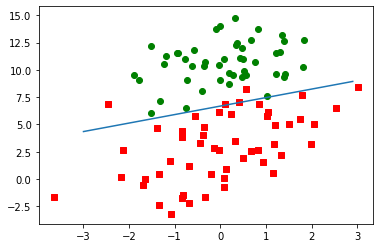

In [7]:
plot_boundary(data, labels, w)

## 3. Stochastic Gradient Descent
During each iteration of gradient descent implementation, the entire dataset must be traversed to update $\mathbf{w}$. On the contract, SGD only requires one data point for update in each iteration, which makes it more economic and suitable for online learning.

In [8]:
def SGD(dataset, labels, alpha = 0.01):
    m,n = dataset.shape
    w = np.ones((n,1))
    for i in range(m):
        h = sigmoid(dataset[i].dot(w))
        error = h - labels[i]       
        w = w - (alpha*error*dataset[i].reshape((n,1)))
    return w

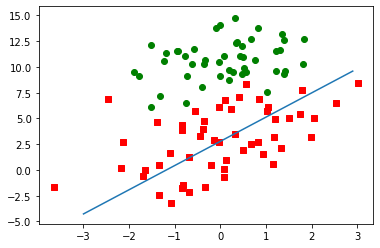

In [9]:
w = SGD(data, labels)
plot_boundary(data, labels, w)

It could be seen that the error rate of SGD is greater than GD, and this is because GD is repeatedly using the entire dataset. Also, $w$ undergoes fluctuation during learning.  

To converge the final result faster and avoid fluctuation, a modified SDG could be applied by updating $\alpha$ during iterations, and by repeatedly doing GSD over a dataset.

In [10]:
def modified_SDG(dataset, labels, iteration = 150):
    m,n = dataset.shape
    w = np.ones((n,1))
    for i in range(iteration):
        dataindex = list(range(m))
        for j in range(m):
            alpha = 4/(1+j+i)+0.01
            index = int(random.uniform(0,len(dataindex)))
            h = sigmoid(dataset[index].dot(w))
            error = h - labels[index]
            w = w - alpha*error*dataset[index].reshape((n,1))
            del dataindex[index]
    return w

[[13.75609513]
 [ 1.24220656]
 [-1.97082466]]


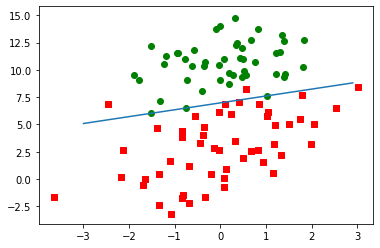

In [11]:
data, labels = loaddata()
new_w = modified_SDG(data, labels)
print(new_w)
plot_boundary(data, labels, new_w)

## 4. Horse Colic
In this example, we use data to predict if colic would lead to death of a horse. One of problems worth considering is that how to deal with missed data. In this case, replace it by $0$ would be a great idea, because a value of $0$ would lead to no influence on $w$, which makes sense since we do not have any information about it.

In [12]:
def classify(subject,w):
    sig = sigmoid(subject.dot(w))
    label = 1 if sig>0.5 else 0
    return label

def read_data(path):
    dataset = []
    labels = []
    with open(path) as f:
        content = f.readlines()
        for line in content:
            line = line.strip().split('\t')
            line = [float(word) for word in line]
            dataset.append(line)
            labels.append(line[-1])
    dataset = np.array(dataset)
    labels = np.array(labels).reshape((len(labels),1))
    return dataset, labels

In [13]:
trainingset, traininglabels = read_data('HorseColicTraining.txt')
testset, testlabels = read_data('HorseColicTest.txt')

In [14]:
def horse_holic():
    w = modified_SDG(trainingset, traininglabels)
    errorcount = 0
    for i in range(testset.shape[0]):
        subject = testset[i].reshape((1,len(testset[i])))
        label = classify(subject, w)
        if label != testlabels[i]:
            errorcount += 1
    rate = errorcount/testset.shape[0]
    return rate

In [15]:
for i in range(10):
    print(horse_holic())

0.08955223880597014
0.13432835820895522
0.11940298507462686
0.2835820895522388
0.13432835820895522
0.13432835820895522
0.1044776119402985
0.1044776119402985
0.13432835820895522
0.14925373134328357


## 5. Scikit-Learn
### 5.1 Principles
We have:
$$\hat{p} = h_{\mathbf{\theta}}(\mathbf{x}) = \sigma(\mathbf{\theta}^T\mathbf{x})$$
And the cost function for a single instance $\mathbf{x}$ is:
$$c(\theta)=
\begin{cases}
-\log{(\hat{p})}& y=1\\
-\log{(1-\hat{p})}& y=0
\end{cases}$$
This cost function will lead to huge cost result ($+\infty$) when the prediction is more closer to the opposite side.  
The cost function for the whole training set is the average of cost of each instance, *e.g.*
$$J(\theta) = -\frac{1}{m}\sum_{i=1}^m [y^{(i)}\log{\hat{p}^{(i)}}+(1-y^{(i)})\log{(1-\hat{p}^{(i)}})]$$

### 5.2 Binary Classification of Iris-Virginica Type
Build a classifier to detect the Iris-Virginica type based only on the petal width feature.

In [16]:
from sklearn import datasets

iris = datasets.load_iris()
print(list(iris.keys()))
X = iris['data'][:,-1:] #petal width, must be a 2D array
y = iris['target']
y = (y==2).astype(np.int) #1 if class 2, else 0, astype true to 1, false to 0

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']


In [17]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(X,y)

xs = np.linspace(0,3,1000).reshape(-1,1) #-1 := count/other
y_proba = logreg.predict_proba(xs)
y_proba[:5,:] #the first col is p of class 0, ...

array([[0.98554411, 0.01445589],
       [0.98543168, 0.01456832],
       [0.98531838, 0.01468162],
       [0.98520422, 0.01479578],
       [0.98508919, 0.01491081]])

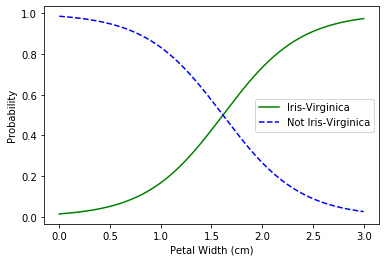

In [18]:
fig2, ax2 = plt.subplots()
ax2.plot(xs, y_proba[:,1], 'g-', label = 'Iris-Virginica')
ax2.plot(xs, y_proba[:,0], 'b--', label = 'Not Iris-Virginica')
ax2.set_xlabel('Petal Width (cm)')
ax2.set_ylabel('Probability')
ax2.legend()

In [19]:
#simply return the predicted class
logreg.predict([[1.7], [1.5]]) 

array([1, 0])

### 5.2 Ternary Classification (Softmax Regession, Multinomial Logistic Regression)

The *Softmax Score* is computed for each class:
$$s_k(\mathbf{x}) = \theta_k^T \mathbf{x}$$
All $\theta_k$ constitude a *Parameter Matrix $\Theta$*.
The probability of instance $\mathbf{x}$ belongs to class $k$ could be estimated by:
$$\hat{p}_k = \sigma(\mathbf{s}(\mathbf{x}))_k = \frac{exp(s_k(\mathbf{x}))}{\sum_{j=1}^K exp(s_j(\mathbf{x}))}$$
Then the prediction could be given by:
$$\hat{y} = argmax_k \sigma(\mathbf{s}(\mathbf{x}))_k = argmax_k s_k(\mathbf{x}) = argmax_k(\theta_k^T \mathbf{x})$$

In [20]:
new_X = iris['data'][:,-2:]
y = iris['target']
logreg2 = LogisticRegression(multi_class = 'multinomial',solver = 'lbfgs', C=10)
logreg2.fit(new_X,y)
labels = logreg2.predict(new_X)

errorcount = 0
for i in range(new_X.shape[0]):
    if labels[i] != y[i]:
        errorcount += 1
print('Error rate: %f%%'%(errorcount/new_X.shape[0]*100))

Error rate: 4.000000%


In [21]:
print(logreg2.predict([[5,2]]))
print(logreg2.predict_proba([[5,2]]))

[2]
[[6.38014896e-07 5.74929995e-02 9.42506362e-01]]
